In [217]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import scipy.stats as st
import numpy as np
# linear modelling
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
# metrics
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Census API Key
from census import Census
from config import api_key
c = Census(api_key, year=2017)

In [2]:
df=pd.read_csv("Airbnb_Texas_Rentals.csv")
df

,Unnamed: 0,average_rate_per_night,bedrooms_count,city,date_of_listing,description,latitude,longitude,title,url
0,1,$27,2,Humble,May 2016,Welcome to stay in private room with queen bed...,30.020138,-95.293996,2 Private rooms/bathroom 10min from IAH airport,https://www.airbnb.com/rooms/18520444?location...
1,2,$149,4,San Antonio,November 2010,"Stylish, fully remodeled home in upscale NW – ...",29.503068,-98.447688,Unique Location! Alamo Heights - Designer Insp...,https://www.airbnb.com/rooms/17481455?location...
2,3,$59,1,Houston,January 2017,'River house on island close to the city' \nA ...,29.829352,-95.081549,River house near the city,https://www.airbnb.com/rooms/16926307?location...
3,4,$60,1,Bryan,February 2016,Private bedroom in a cute little home situated...,30.637304,-96.337846,Private Room Close to Campus,https://www.airbnb.com/rooms/11839729?location...
4,5,$75,2,Fort Worth,February 2017,Welcome to our original 1920's home. We recent...,32.747097,-97.286434,The Porch,https://www.airbnb.com/rooms/17325114?location...
...,...,...,...,...,...,...,...,...,...,...
18254,18255,$60,1,Dallas,March 2013,An entire 1 bedroom 700+sqft condo in the hear...,32.892303,-96.772049,Quiet comfort living in Dallas,https://www.airbnb.com/rooms/1011576?location=...
18255,18256,$99,2,San Antonio,June 2015,An inviting 1920's cottage home in a popular u...,29.452893,-98.486756,Midtown Cottage Near Riverwalk,https://www.airbnb.com/rooms/18766940?location...
18256,18257,$13,1,Dallas,December 2016,Amazing 3BHK Apartment in a picturesque Commun...,33.001955,-96.777615,Room in Dallas!,https://www.airbnb.com/rooms/18719059?location...
18257,18258,$65,2,San Antonio,October 2016,My quaint and cozy home is conveniently locate...,29.450142,-98.505333,Vibrant Spacious Loft!,https://www.airbnb.com/rooms/18179329?location...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18259 entries, 0 to 18258
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              18259 non-null  int64  
 1   average_rate_per_night  18231 non-null  object 
 2   bedrooms_count          18256 non-null  object 
 3   city                    18259 non-null  object 
 4   date_of_listing         18259 non-null  object 
 5   description             18257 non-null  object 
 6   latitude                18225 non-null  float64
 7   longitude               18225 non-null  float64
 8   title                   18256 non-null  object 
 9   url                     18259 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.4+ MB


In [4]:
df.count()

Unnamed: 0                18259
average_rate_per_night    18231
bedrooms_count            18256
city                      18259
date_of_listing           18259
description               18257
latitude                  18225
longitude                 18225
title                     18256
url                       18259
dtype: int64

In [5]:
clean_df = df.dropna()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18217 entries, 0 to 18258
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              18217 non-null  int64  
 1   average_rate_per_night  18217 non-null  object 
 2   bedrooms_count          18217 non-null  object 
 3   city                    18217 non-null  object 
 4   date_of_listing         18217 non-null  object 
 5   description             18217 non-null  object 
 6   latitude                18217 non-null  float64
 7   longitude               18217 non-null  float64
 8   title                   18217 non-null  object 
 9   url                     18217 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.5+ MB


In [6]:
# summary data frame
clean_df2 = clean_df.loc[:, ["city", "date_of_listing", "bedrooms_count", "average_rate_per_night", "latitude", "longitude"]]
clean_df2

,city,date_of_listing,bedrooms_count,average_rate_per_night,latitude,longitude
0,Humble,May 2016,2,$27,30.020138,-95.293996
1,San Antonio,November 2010,4,$149,29.503068,-98.447688
2,Houston,January 2017,1,$59,29.829352,-95.081549
3,Bryan,February 2016,1,$60,30.637304,-96.337846
4,Fort Worth,February 2017,2,$75,32.747097,-97.286434
...,...,...,...,...,...,...
18254,Dallas,March 2013,1,$60,32.892303,-96.772049
18255,San Antonio,June 2015,2,$99,29.452893,-98.486756
18256,Dallas,December 2016,1,$13,33.001955,-96.777615
18257,San Antonio,October 2016,2,$65,29.450142,-98.505333


In [7]:
clean_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18217 entries, 0 to 18258
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    18217 non-null  object 
 1   date_of_listing         18217 non-null  object 
 2   bedrooms_count          18217 non-null  object 
 3   average_rate_per_night  18217 non-null  object 
 4   latitude                18217 non-null  float64
 5   longitude               18217 non-null  float64
dtypes: float64(2), object(4)
memory usage: 996.2+ KB


In [8]:
clean_df2["date_of_listing"]=pd.to_datetime(clean_df2["date_of_listing"])

clean_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18217 entries, 0 to 18258
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    18217 non-null  object        
 1   date_of_listing         18217 non-null  datetime64[ns]
 2   bedrooms_count          18217 non-null  object        
 3   average_rate_per_night  18217 non-null  object        
 4   latitude                18217 non-null  float64       
 5   longitude               18217 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 996.2+ KB


In [9]:
clean_df2["year"]=[x.year for x in clean_df2.date_of_listing]
clean_df2.head()

,city,date_of_listing,bedrooms_count,average_rate_per_night,latitude,longitude,year
0,Humble,2016-05-01,2,$27,30.020138,-95.293996,2016
1,San Antonio,2010-11-01,4,$149,29.503068,-98.447688,2010
2,Houston,2017-01-01,1,$59,29.829352,-95.081549,2017
3,Bryan,2016-02-01,1,$60,30.637304,-96.337846,2016
4,Fort Worth,2017-02-01,2,$75,32.747097,-97.286434,2017


In [10]:
unique_year = clean_df2["year"].nunique()
unique_year

10

In [11]:
clean_df2["month"]=[x.month for x in clean_df2.date_of_listing]
clean_df2.head()

,city,date_of_listing,bedrooms_count,average_rate_per_night,latitude,longitude,year,month
0,Humble,2016-05-01,2,$27,30.020138,-95.293996,2016,5
1,San Antonio,2010-11-01,4,$149,29.503068,-98.447688,2010,11
2,Houston,2017-01-01,1,$59,29.829352,-95.081549,2017,1
3,Bryan,2016-02-01,1,$60,30.637304,-96.337846,2016,2
4,Fort Worth,2017-02-01,2,$75,32.747097,-97.286434,2017,2


In [12]:
clean_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18217 entries, 0 to 18258
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    18217 non-null  object        
 1   date_of_listing         18217 non-null  datetime64[ns]
 2   bedrooms_count          18217 non-null  object        
 3   average_rate_per_night  18217 non-null  object        
 4   latitude                18217 non-null  float64       
 5   longitude               18217 non-null  float64       
 6   year                    18217 non-null  int64         
 7   month                   18217 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [13]:
mask1 = clean_df2.loc[clean_df2['year']==2012].index
mask2 = clean_df2.loc[clean_df2['year']==2011].index
mask3 = clean_df2.loc[clean_df2['year']==2010].index
mask4 = clean_df2.loc[clean_df2['year']==2009].index
mask5 = clean_df2.loc[clean_df2['year']==2008].index

In [14]:
mask1.array

<PandasArray>
[   12,    37,    89,   222,   262,   276,   311,   327,   340,   351,
 ...
 18090, 18120, 18136, 18137, 18146, 18159, 18184, 18205, 18213, 18215]
Length: 799, dtype: int64

In [15]:
clean_df3 = clean_df2[~(clean_df2.year.isin([2012, 2011, 2010, 2009, 2008]))].reset_index()
clean_df3.head()

,index,city,date_of_listing,bedrooms_count,average_rate_per_night,latitude,longitude,year,month
0,0,Humble,2016-05-01,2,$27,30.020138,-95.293996,2016,5
1,2,Houston,2017-01-01,1,$59,29.829352,-95.081549,2017,1
2,3,Bryan,2016-02-01,1,$60,30.637304,-96.337846,2016,2
3,4,Fort Worth,2017-02-01,2,$75,32.747097,-97.286434,2017,2
4,5,Conroe,2016-08-01,4,$250,30.370455,-95.385319,2016,8


In [16]:
clean_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16799 entries, 0 to 16798
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   16799 non-null  int64         
 1   city                    16799 non-null  object        
 2   date_of_listing         16799 non-null  datetime64[ns]
 3   bedrooms_count          16799 non-null  object        
 4   average_rate_per_night  16799 non-null  object        
 5   latitude                16799 non-null  float64       
 6   longitude               16799 non-null  float64       
 7   year                    16799 non-null  int64         
 8   month                   16799 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 1.2+ MB


In [17]:
# Create the bins in which Data will be held
# Bins are  12-1-2016, 7-1-2016, 1-1-2018
bins = [0, 3, 6, 9, 12]

# Create the names for the five bins
group_names = ["First", "Second", "Third", "Fourth"]

In [18]:
clean_df3["Date_Quarter"] = pd.cut(clean_df3["month"], bins, labels=group_names, include_lowest=True)
clean_df3

,index,city,date_of_listing,bedrooms_count,average_rate_per_night,latitude,longitude,year,month,Date_Quarter
0,0,Humble,2016-05-01,2,$27,30.020138,-95.293996,2016,5,Second
1,2,Houston,2017-01-01,1,$59,29.829352,-95.081549,2017,1,First
2,3,Bryan,2016-02-01,1,$60,30.637304,-96.337846,2016,2,First
3,4,Fort Worth,2017-02-01,2,$75,32.747097,-97.286434,2017,2,First
4,5,Conroe,2016-08-01,4,$250,30.370455,-95.385319,2016,8,Third
...,...,...,...,...,...,...,...,...,...,...
16794,18254,Dallas,2013-03-01,1,$60,32.892303,-96.772049,2013,3,First
16795,18255,San Antonio,2015-06-01,2,$99,29.452893,-98.486756,2015,6,Second
16796,18256,Dallas,2016-12-01,1,$13,33.001955,-96.777615,2016,12,Fourth
16797,18257,San Antonio,2016-10-01,2,$65,29.450142,-98.505333,2016,10,Fourth


In [19]:
# summary data frame
clean_df4 = clean_df3.loc[:, ["city", "year", "Date_Quarter", "bedrooms_count", "average_rate_per_night", "latitude", "longitude"]]
clean_df4.head()

,city,year,Date_Quarter,bedrooms_count,average_rate_per_night,latitude,longitude
0,Humble,2016,Second,2,$27,30.020138,-95.293996
1,Houston,2017,First,1,$59,29.829352,-95.081549
2,Bryan,2016,First,1,$60,30.637304,-96.337846
3,Fort Worth,2017,First,2,$75,32.747097,-97.286434
4,Conroe,2016,Third,4,$250,30.370455,-95.385319


In [20]:
# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="http")

In [ ]:
# location = geolocator.reverse("30.020138, -95.293996")
# location.raw

In [ ]:
# counties = []
# zipcodes = []

# for indx,row in clean_df4.iterrows():
#     lat=row["latitude"]
#     lon=row["longitude"]
#     location = geolocator.reverse(f"{lat}, {lon}", timeout=None)
    
#     county = location.raw["address"].get("county")
#     zipcode = location.raw["address"].get("postcode")
#     counties.append(county)
#     zipcodes.append(zipcode)

#     if indx % 100==0:
#         print(indx)
    

In [ ]:
# len(counties)

In [ ]:
# clean_df4.head()

In [ ]:
# len(zipcodes)

In [ ]:
# counties

In [ ]:
# clean_df4['counties'] = counties
# clean_df4['zipcodes'] = zipcodes
# clean_df4

In [21]:
# Export file as a CSV, without the Pandas index, but with the header - So we don't have to run the above code every
# time we open the file. 
# clean_df4.to_csv("airbnb_counties.csv", index=False, header=True)

In [30]:
# read in airbnb_counties csv
airbnb_df=pd.read_csv("airbnb_counties.csv")
airbnb_df

,city,year,Date_Quarter,bedrooms_count,average_rate_per_night,latitude,longitude,counties,zipcodes
0,Humble,2016,Second,2,$27,30.020138,-95.293996,Harris County,77338
1,Houston,2017,First,1,$59,29.829352,-95.081549,Harris County,77049
2,Bryan,2016,First,1,$60,30.637304,-96.337846,Brazos County,77802
3,Fort Worth,2017,First,2,$75,32.747097,-97.286434,Tarrant County,76103
4,Conroe,2016,Third,4,$250,30.370455,-95.385319,Montgomery County,77303
...,...,...,...,...,...,...,...,...,...
16794,Dallas,2013,First,1,$60,32.892303,-96.772049,Dallas County,75230
16795,San Antonio,2015,Second,2,$99,29.452893,-98.486756,Bexar County,78212
16796,Dallas,2016,Fourth,1,$13,33.001955,-96.777615,Collin County,75252
16797,San Antonio,2016,Fourth,2,$65,29.450142,-98.505333,Bexar County,78212


In [23]:
# Need to loop through census file to get population

In [24]:
# read in census csv
census_df=pd.read_csv("acs2017_county_data.csv")
census_df

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,72145,Puerto Rico,Vega Baja Municipio,54754,26269,28485,96.7,3.1,0.1,0.0,...,1.4,0.6,0.9,31.6,14234,76.2,19.3,4.3,0.2,16.8
3216,72147,Puerto Rico,Vieques Municipio,8931,4351,4580,95.7,4.0,0.0,0.0,...,5.0,0.0,1.7,14.9,2927,40.7,40.9,18.4,0.0,12.8
3217,72149,Puerto Rico,Villalba Municipio,23659,11510,12149,99.7,0.2,0.1,0.0,...,2.1,0.0,2.8,28.4,6873,59.2,30.2,10.4,0.2,24.8
3218,72151,Puerto Rico,Yabucoa Municipio,35025,16984,18041,99.9,0.1,0.0,0.0,...,1.4,1.8,0.1,30.5,7878,62.7,30.9,6.3,0.0,25.4


In [25]:
census_tx = census_df.loc[census_df.State == "Texas"]
census_tx

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
2523,48001,Texas,Anderson County,57747,35292,22455,17.3,59.7,20.9,0.3,...,0.5,0.7,3.6,23.7,19102,73.2,20.4,6.2,0.2,4.3
2524,48003,Texas,Andrews County,17577,8980,8597,55.4,41.1,1.5,0.1,...,0.0,0.8,2.5,19.8,8054,85.3,8.7,5.7,0.3,4.5
2525,48005,Texas,Angelina County,87700,42707,44993,21.5,61.2,14.7,0.1,...,1.7,0.9,2.2,18.7,36164,77.2,16.7,6.0,0.1,7.6
2526,48007,Texas,Aransas County,24832,12448,12384,27.0,67.7,1.6,0.0,...,2.8,0.5,6.8,20.8,10387,72.9,12.3,14.6,0.2,6.7
2527,48009,Texas,Archer County,8793,4335,4458,8.3,88.6,0.8,0.3,...,1.0,1.1,4.7,20.4,4344,75.6,14.5,9.8,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2772,48499,Texas,Wood County,43315,21523,21792,9.6,83.2,5.5,0.6,...,2.5,1.0,5.6,30.2,15960,78.4,14.1,7.1,0.4,7.8
2773,48501,Texas,Yoakum County,8481,4286,4195,65.0,33.2,0.0,0.2,...,3.7,0.2,1.3,16.2,3755,71.7,17.5,10.7,0.1,7.5
2774,48503,Texas,Young County,18166,8922,9244,18.1,78.8,1.5,0.5,...,0.6,1.4,6.1,15.3,8248,69.8,17.1,11.9,1.2,4.5
2775,48505,Texas,Zapata County,14415,7190,7225,94.1,5.2,0.0,0.0,...,4.4,0.6,2.0,18.2,5146,66.0,21.0,12.6,0.4,12.4


In [26]:
census_tx.loc[census_tx.County == "Harris County"]

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
2623,48201,Texas,Harris County,4525519,2251060,2274459,42.2,30.6,18.5,0.2,...,1.5,1.9,3.7,28.9,2180392,83.4,9.8,6.6,0.2,6.4


In [27]:
# summary data frame
clean_tx = census_tx.loc[:, ["County", "TotalPop", "Income", "Poverty"]]
clean_tx

,County,TotalPop,Income,Poverty
2523,Anderson County,57747,42313,15.7
2524,Andrews County,17577,70753,11.9
2525,Angelina County,87700,46472,19.1
2526,Aransas County,24832,44601,17.8
2527,Archer County,8793,63192,8.8
...,...,...,...,...
2772,Wood County,43315,48038,13.3
2773,Yoakum County,8481,62500,12.3
2774,Young County,18166,46351,16.5
2775,Zapata County,14415,34550,34.1


In [28]:
clean_tx.loc[census_tx.County == "Harris County"]

,County,TotalPop,Income,Poverty
2623,Harris County,4525519,57791,16.8


In [281]:
clean_tx = clean_tx.rename(columns = {"County":"counties"})
clean_tx.head()
census_data_airbnbtx = pd.merge(airbnb_df, clean_tx, on="counties")
census_data_airbnbtx.head()

,city,year,Date_Quarter,bedrooms_count,average_rate_per_night,latitude,longitude,counties,zipcodes,bedrooms_clean,bedrooms,TotalPop,Income,Poverty
0,Humble,2016,Second,2,27,30.020138,-95.293996,Harris County,77338,2,2,4525519,57791,16.8
1,Houston,2017,First,1,59,29.829352,-95.081549,Harris County,77049,1,1,4525519,57791,16.8
2,Houston,2017,First,4,1500,29.954680,-95.176070,Harris County,77044,4,4,4525519,57791,16.8
3,Katy,2017,First,4,2999,29.823802,-95.730637,Harris County,77449,4,4,4525519,57791,16.8
4,Katy,2016,Third,3,165,29.766553,-95.783192,Harris County,77494,3,3,4525519,57791,16.8


In [282]:
# Checking the number of counties in DataFrame.

unique_counties = airbnb_df['counties'].nunique()
unique_counties

106

In [283]:
# types of bedrooms in data set

counties_count = airbnb_df.groupby("bedrooms_count").size()
counties_count

bedrooms_count
1         8592
10           7
11           1
13           1
2         3022
3         2581
4         1163
5          384
6           74
7           33
8           20
9            3
Studio     918
dtype: int64

In [284]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16799 entries, 0 to 16798
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    16799 non-null  object 
 1   year                    16799 non-null  int64  
 2   Date_Quarter            16799 non-null  object 
 3   bedrooms_count          16799 non-null  object 
 4   average_rate_per_night  16799 non-null  int64  
 5   latitude                16799 non-null  float64
 6   longitude               16799 non-null  float64
 7   counties                16799 non-null  object 
 8   zipcodes                16030 non-null  object 
 9   bedrooms_clean          16799 non-null  object 
 10  bedrooms                16799 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 1.4+ MB


In [288]:
# Change 'Studio' room to 0
# Change value from object to numeric

bedrooms_clean = airbnb_df['bedrooms_count']

bedrooms_clean = pd.to_numeric(["0" if i=='Studio' else i for i in my_list])
bedrooms_clean

array([2, 1, 1, ..., 1, 2, 1])

In [289]:
# Add bedrooms into Data Frame
airbnb_df['bedrooms'] = bedrooms_clean
airbnb_df

,city,year,Date_Quarter,bedrooms_count,average_rate_per_night,latitude,longitude,counties,zipcodes,bedrooms_clean,bedrooms
0,Humble,2016,Second,2,27,30.020138,-95.293996,Harris County,77338,2,2
1,Houston,2017,First,1,59,29.829352,-95.081549,Harris County,77049,1,1
2,Bryan,2016,First,1,60,30.637304,-96.337846,Brazos County,77802,1,1
3,Fort Worth,2017,First,2,75,32.747097,-97.286434,Tarrant County,76103,2,2
4,Conroe,2016,Third,4,250,30.370455,-95.385319,Montgomery County,77303,4,4
...,...,...,...,...,...,...,...,...,...,...,...
16794,Dallas,2013,First,1,60,32.892303,-96.772049,Dallas County,75230,1,1
16795,San Antonio,2015,Second,2,99,29.452893,-98.486756,Bexar County,78212,2,2
16796,Dallas,2016,Fourth,1,13,33.001955,-96.777615,Collin County,75252,1,1
16797,San Antonio,2016,Fourth,2,65,29.450142,-98.505333,Bexar County,78212,2,2


In [305]:
# Remove $ and convert into integer

# airbnb_df['average_rate_per_night'] = airbnb_df['average_rate_per_night'].str.replace('$', '').astype(int)
# airbnb_df

In [342]:
# Data fram to put in Bedrooms and Remove bedrooms_count

airbnb_df1 = census_data_airbnbtx.loc[:, ["city", "year", "Date_Quarter", "bedrooms", "average_rate_per_night", "latitude", "longitude", 'counties', 'zipcodes', 'TotalPop', 'Income', 'Poverty']]
airbnb_df1.head()


,city,year,Date_Quarter,bedrooms,average_rate_per_night,latitude,longitude,counties,zipcodes,TotalPop,Income,Poverty
0,Humble,2016,Second,2,27,30.020138,-95.293996,Harris County,77338,4525519,57791,16.8
1,Houston,2017,First,1,59,29.829352,-95.081549,Harris County,77049,4525519,57791,16.8
2,Houston,2017,First,4,1500,29.954680,-95.176070,Harris County,77044,4525519,57791,16.8
3,Katy,2017,First,4,2999,29.823802,-95.730637,Harris County,77449,4525519,57791,16.8
4,Katy,2016,Third,3,165,29.766553,-95.783192,Harris County,77494,4525519,57791,16.8


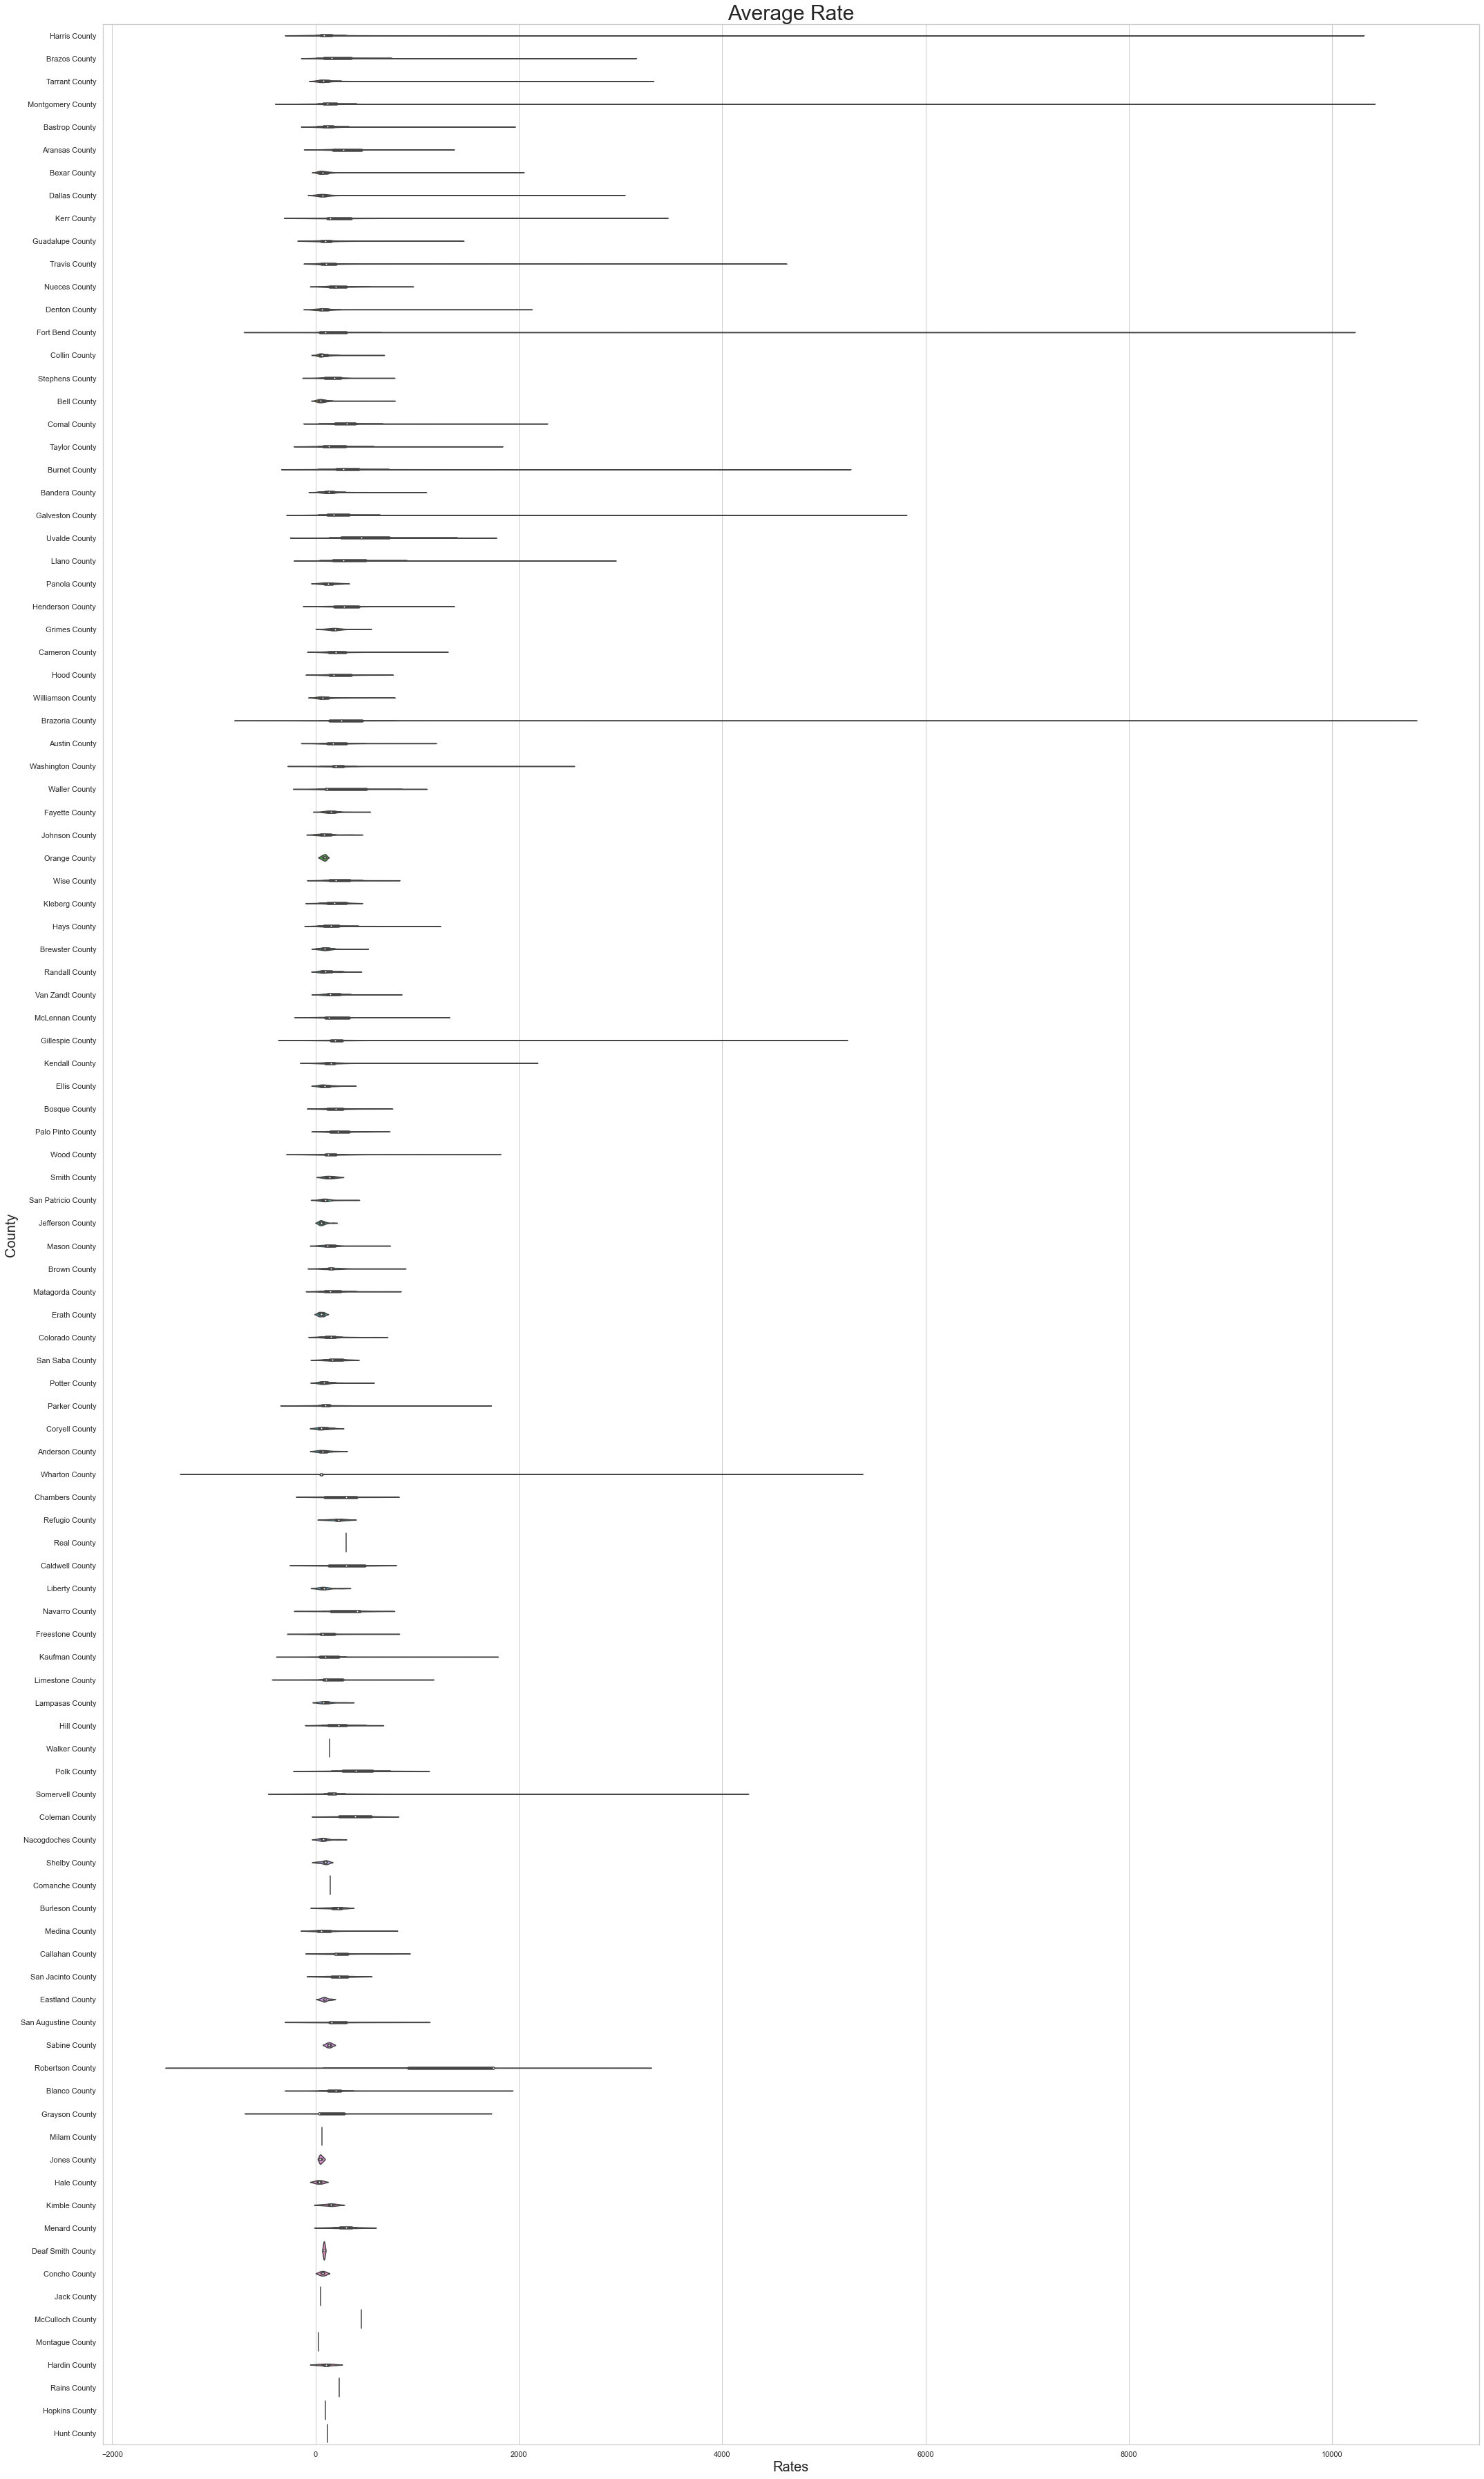

In [426]:
plt.figure(figsize = (30,50))
sns.violinplot(x='average_rate_per_night', y="counties", data=airbnb_df1)
plt.title("Average Rate", size=30)
plt.xlabel("Rates", size=20)
plt.ylabel("County", size=20)
plt.tight_layout()

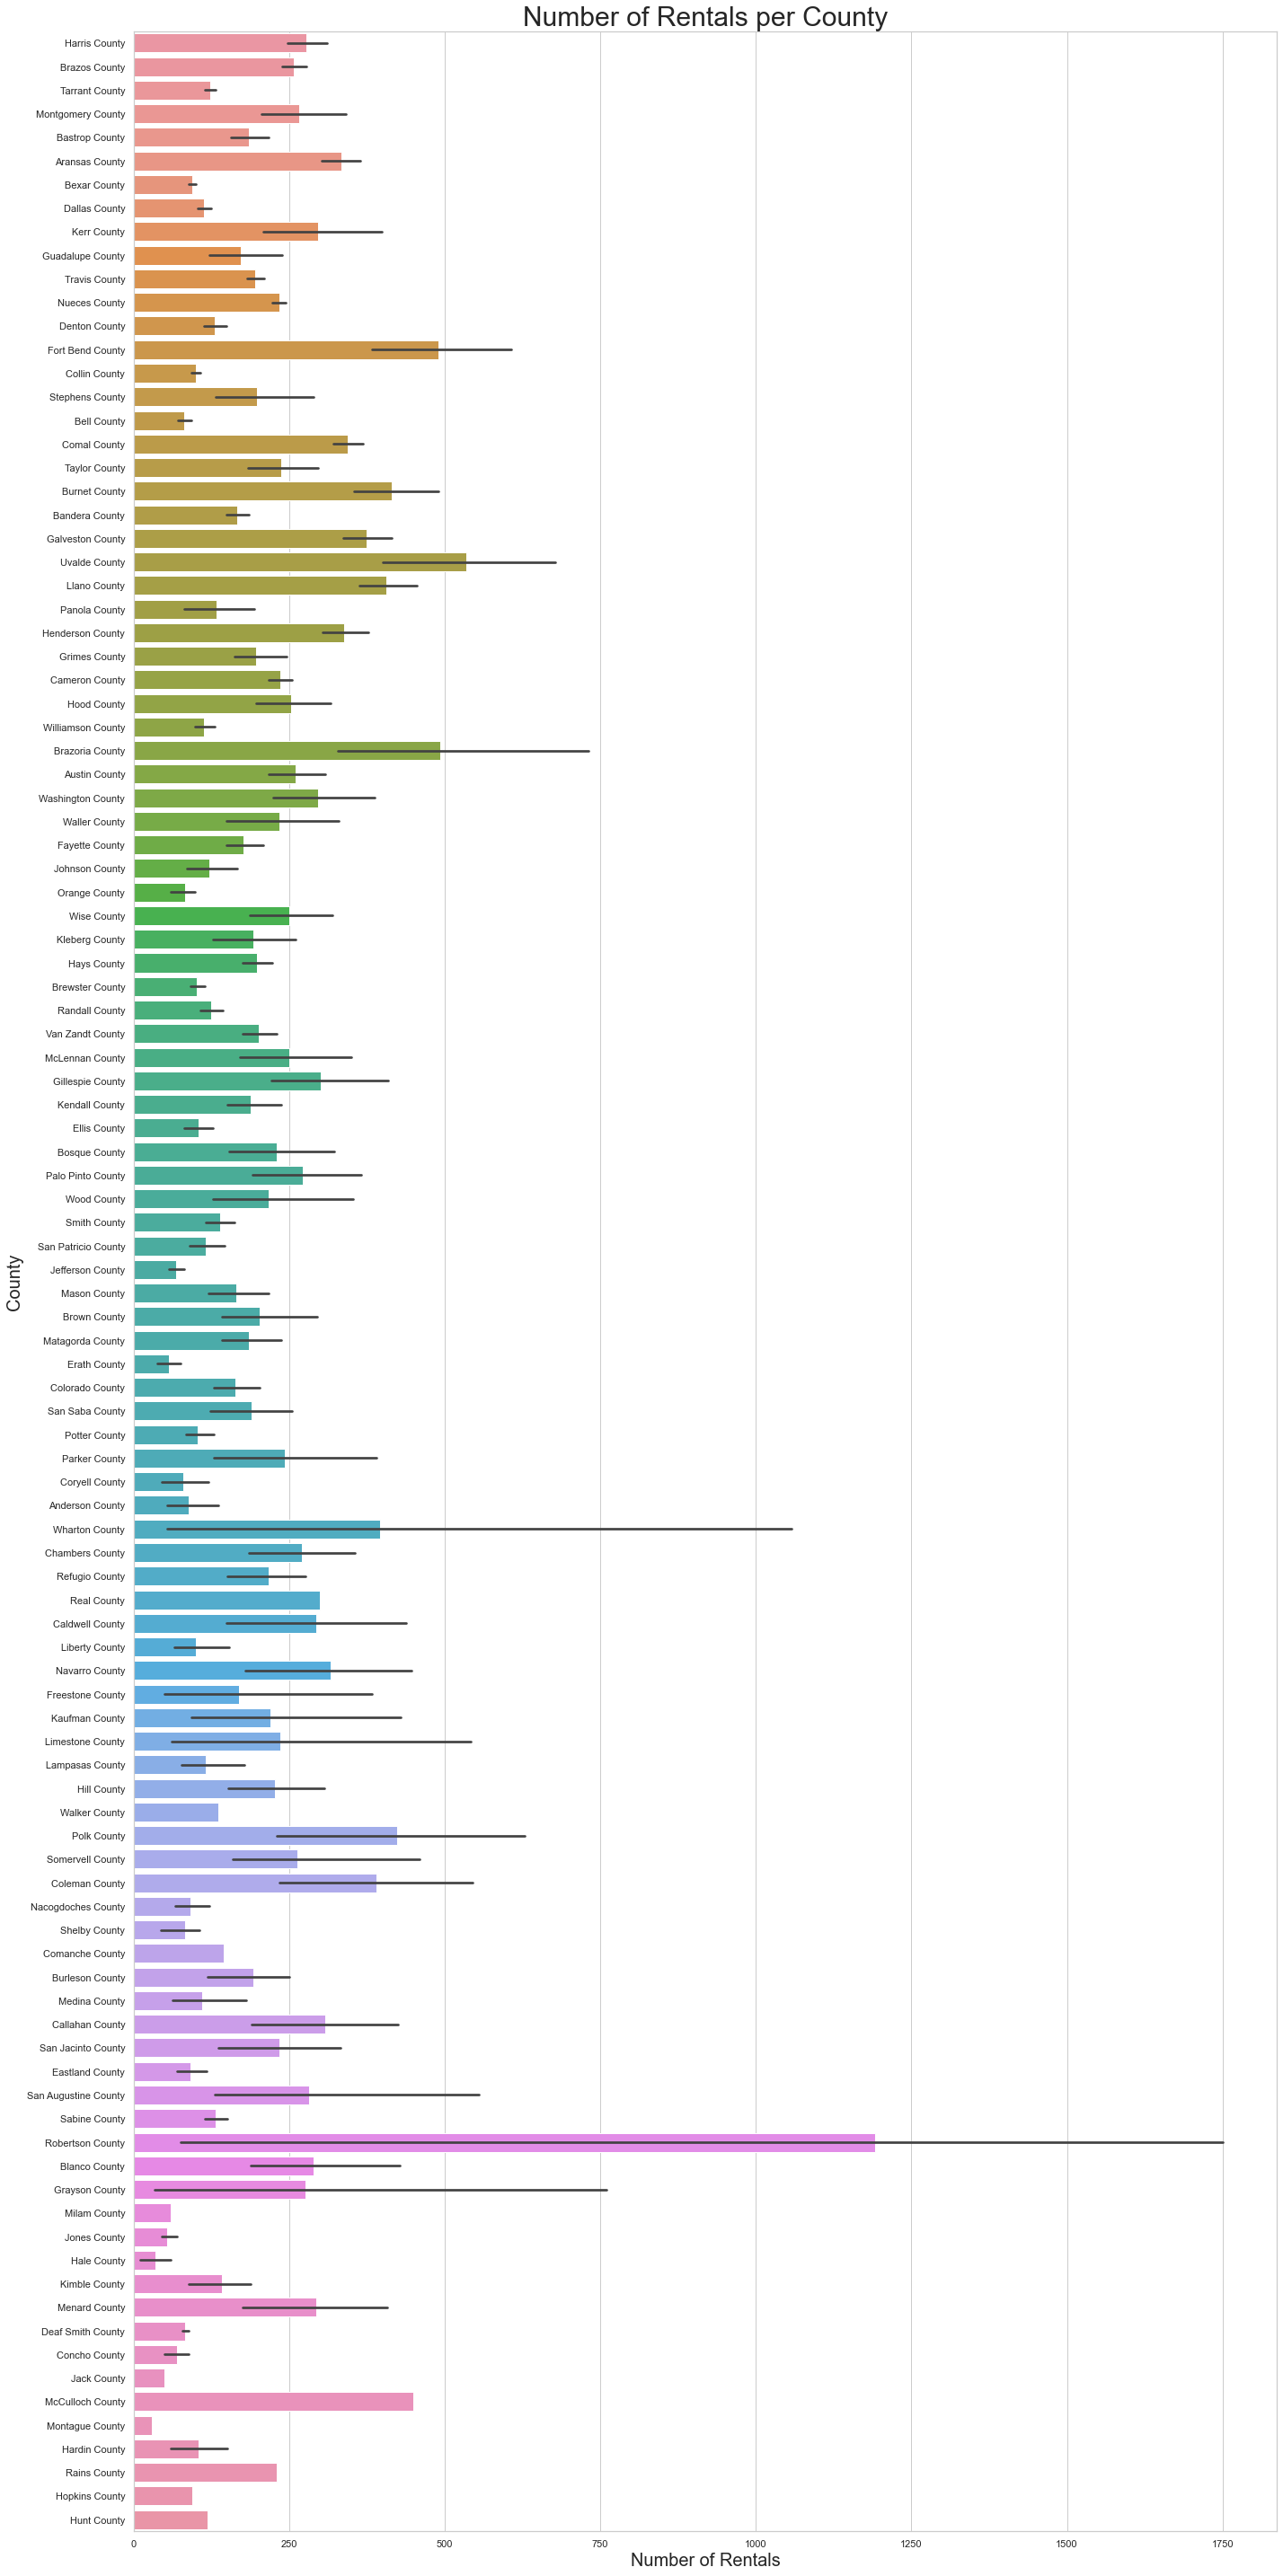

In [428]:
plt.figure(figsize = (20,40))
sns.barplot(x='average_rate_per_night', y="counties", data=airbnb_df1)
plt.title("Number of Rentals per County", size=30)
plt.xlabel("Number of Rentals", size=20)
plt.ylabel("County", size=20)
plt.tight_layout()

In [343]:
# verify bedrooms is an integer

airbnb_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16799 entries, 0 to 16798
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    16799 non-null  object 
 1   year                    16799 non-null  int64  
 2   Date_Quarter            16799 non-null  object 
 3   bedrooms                16799 non-null  int64  
 4   average_rate_per_night  16799 non-null  int64  
 5   latitude                16799 non-null  float64
 6   longitude               16799 non-null  float64
 7   counties                16799 non-null  object 
 8   zipcodes                16030 non-null  object 
 9   TotalPop                16799 non-null  int64  
 10  Income                  16799 non-null  int64  
 11  Poverty                 16799 non-null  float64
dtypes: float64(3), int64(5), object(4)
memory usage: 1.7+ MB


In [344]:
# Agerage bedrooms per county

bedroom_mean = round((airbnb_df1.groupby("counties").bedrooms.mean()),2).sort_values(ascending=False).head(10)
bedroom_mean

counties
Jack County         7.00
Robertson County    5.67
Menard County       4.33
McCulloch County    4.00
Coleman County      3.50
Navarro County      3.50
San Saba County     3.17
Henderson County    3.12
Chambers County     3.05
Uvalde County       3.04
Name: bedrooms, dtype: float64

In [345]:
bedroom_df = bedroom_mean.iloc[:10]
bedroom_df

counties
Jack County         7.00
Robertson County    5.67
Menard County       4.33
McCulloch County    4.00
Coleman County      3.50
Navarro County      3.50
San Saba County     3.17
Henderson County    3.12
Chambers County     3.05
Uvalde County       3.04
Name: bedrooms, dtype: float64

In [346]:
Bedroom_summ = pd.DataFrame(data=bedroom_df)
Bedroom_summ.columns = ["Average Number of Bedrooms"]
Bedroom_summ

,Average Number of Bedrooms
counties,
Jack County,7.00
Robertson County,5.67
Menard County,4.33
McCulloch County,4.00
Coleman County,3.50
Navarro County,3.50
San Saba County,3.17
Henderson County,3.12
Chambers County,3.05


<AxesSubplot:>

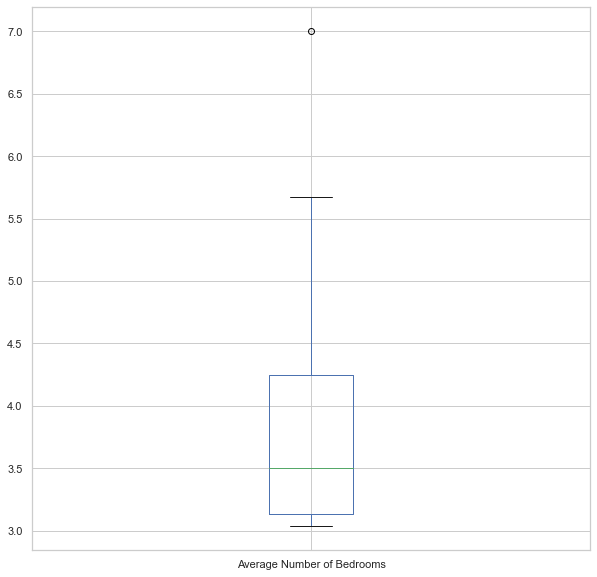

In [347]:
Bedroom_summ.plot(kind="box", figsize=(10,10))

<AxesSubplot:xlabel='Average Number of Bedrooms'>

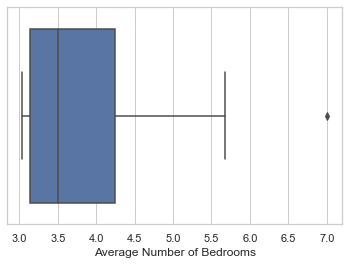

In [348]:
sns.boxplot(x=Bedroom_summ['Average Number of Bedrooms'])

In [349]:
county_list = airbnb_df1['counties']
county_list

0         Harris County
1         Harris County
2         Harris County
3         Harris County
4         Harris County
              ...      
16794     Hardin County
16795     Hardin County
16796      Rains County
16797    Hopkins County
16798       Hunt County
Name: counties, Length: 16799, dtype: object

In [350]:
airbnb_bedroom = airbnb_df.loc[:, ['counties', "bedrooms"]]
airbnb_bedroom


,counties,bedrooms
0,Harris County,2
1,Harris County,1
2,Brazos County,1
3,Tarrant County,2
4,Montgomery County,4
...,...,...
16794,Dallas County,1
16795,Bexar County,2
16796,Collin County,1
16797,Bexar County,2


<AxesSubplot:>

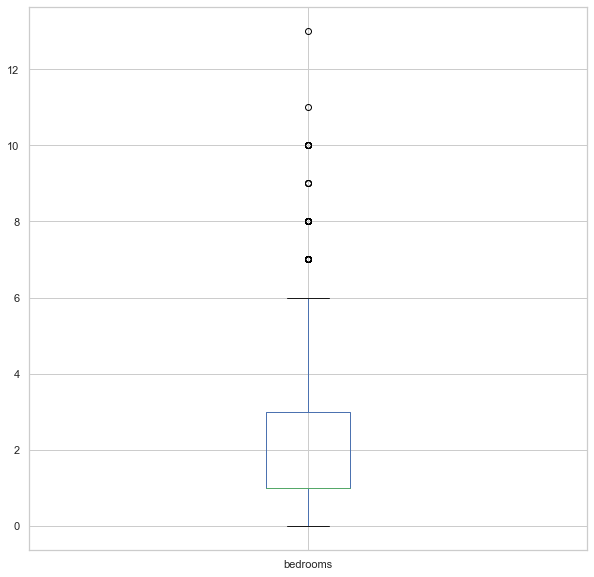

In [351]:
airbnb_bedroom.plot(kind="box", figsize=(10,10))

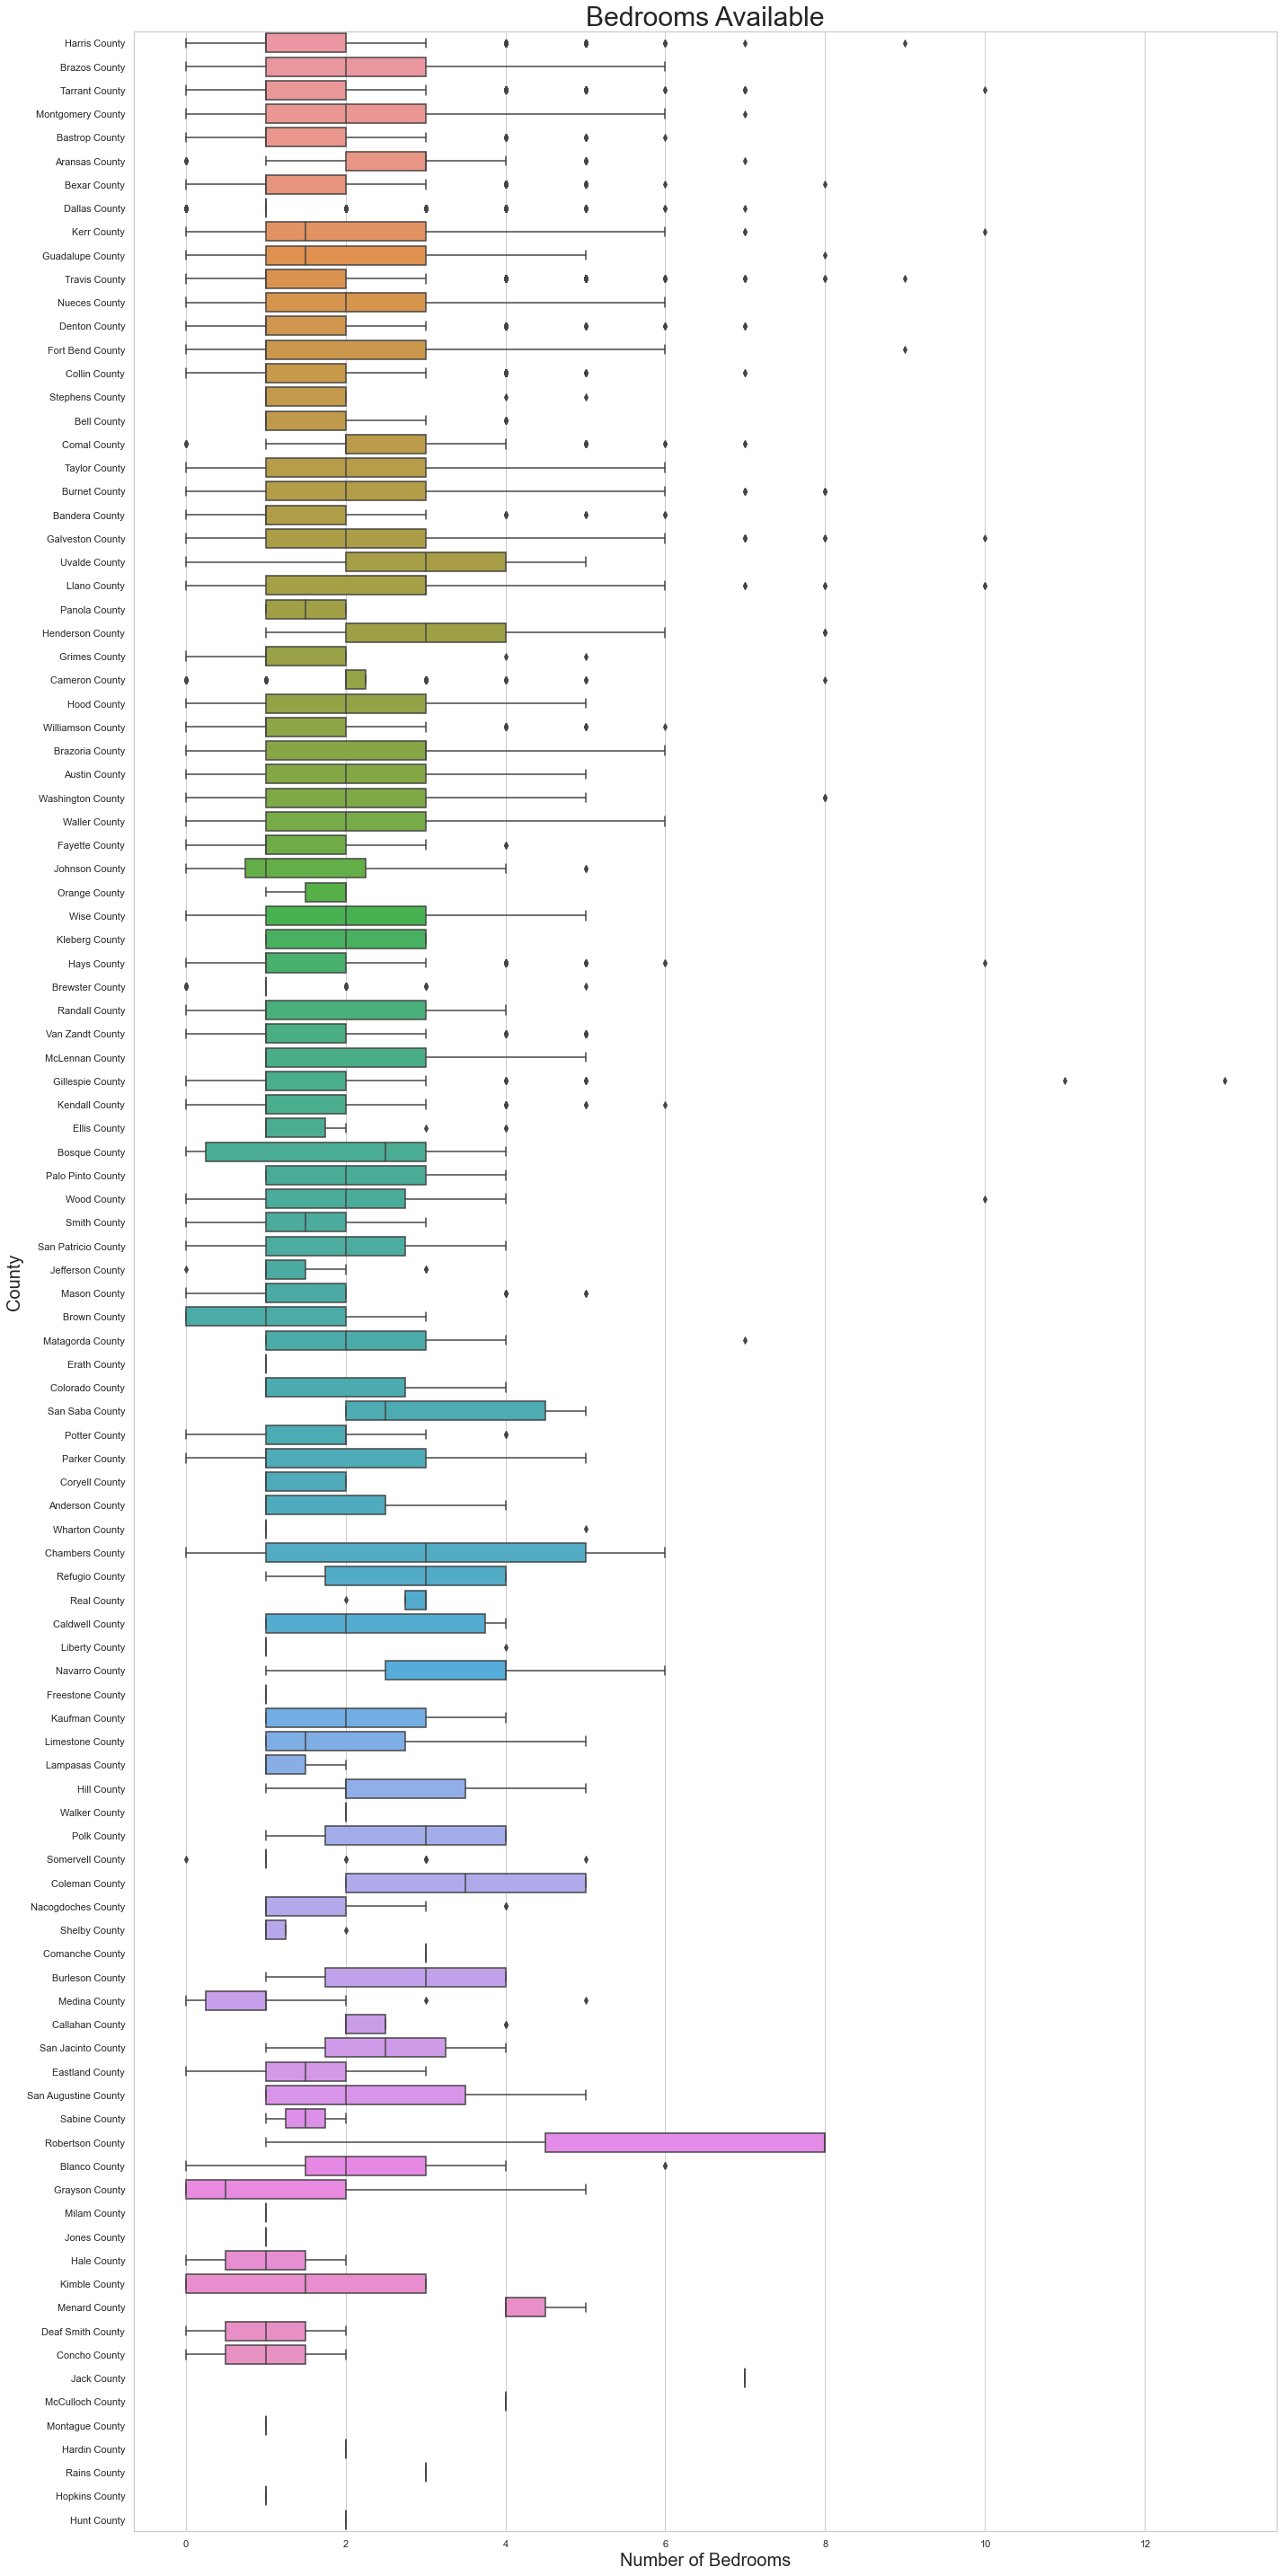

In [352]:
plt.figure(figsize = (20,40))
sns.boxplot(x='bedrooms', y="counties", data=airbnb_bedroom)
plt.title("Bedrooms Available", size=30)
plt.xlabel("Number of Bedrooms", size=20)
plt.ylabel("County", size=20)
plt.tight_layout()

In [353]:
unique_counties = airbnb_df1['counties'].nunique()
unique_counties

106

In [354]:
counties_count = round((airbnb_df1.groupby("counties").counties.count()),2)
counties_count.sort_values(ascending=False).head(10)

counties
Harris County       2012
Travis County       1636
Tarrant County      1487
Dallas County       1422
Bexar County        1203
Brazos County        796
Galveston County     765
Nueces County        765
Collin County        681
Denton County        658
Name: counties, dtype: int64

In [355]:
counties_count = airbnb_df1.groupby("counties").size()
counties_count.sort_values(ascending=False).head(10)

counties
Harris County       2012
Travis County       1636
Tarrant County      1487
Dallas County       1422
Bexar County        1203
Brazos County        796
Galveston County     765
Nueces County        765
Collin County        681
Denton County        658
dtype: int64

In [391]:
county_count = airbnb_df1.groupby('counties')['city'].count().reset_index()

county_count.sort_values(by='city', ascending=False).head(10)

,counties,city
42,Harris County,2012
96,Travis County,1636
94,Tarrant County,1487
26,Dallas County,1422
6,Bexar County,1203
10,Brazos County,796
73,Nueces County,765
35,Galveston County,765
20,Collin County,681
28,Denton County,658


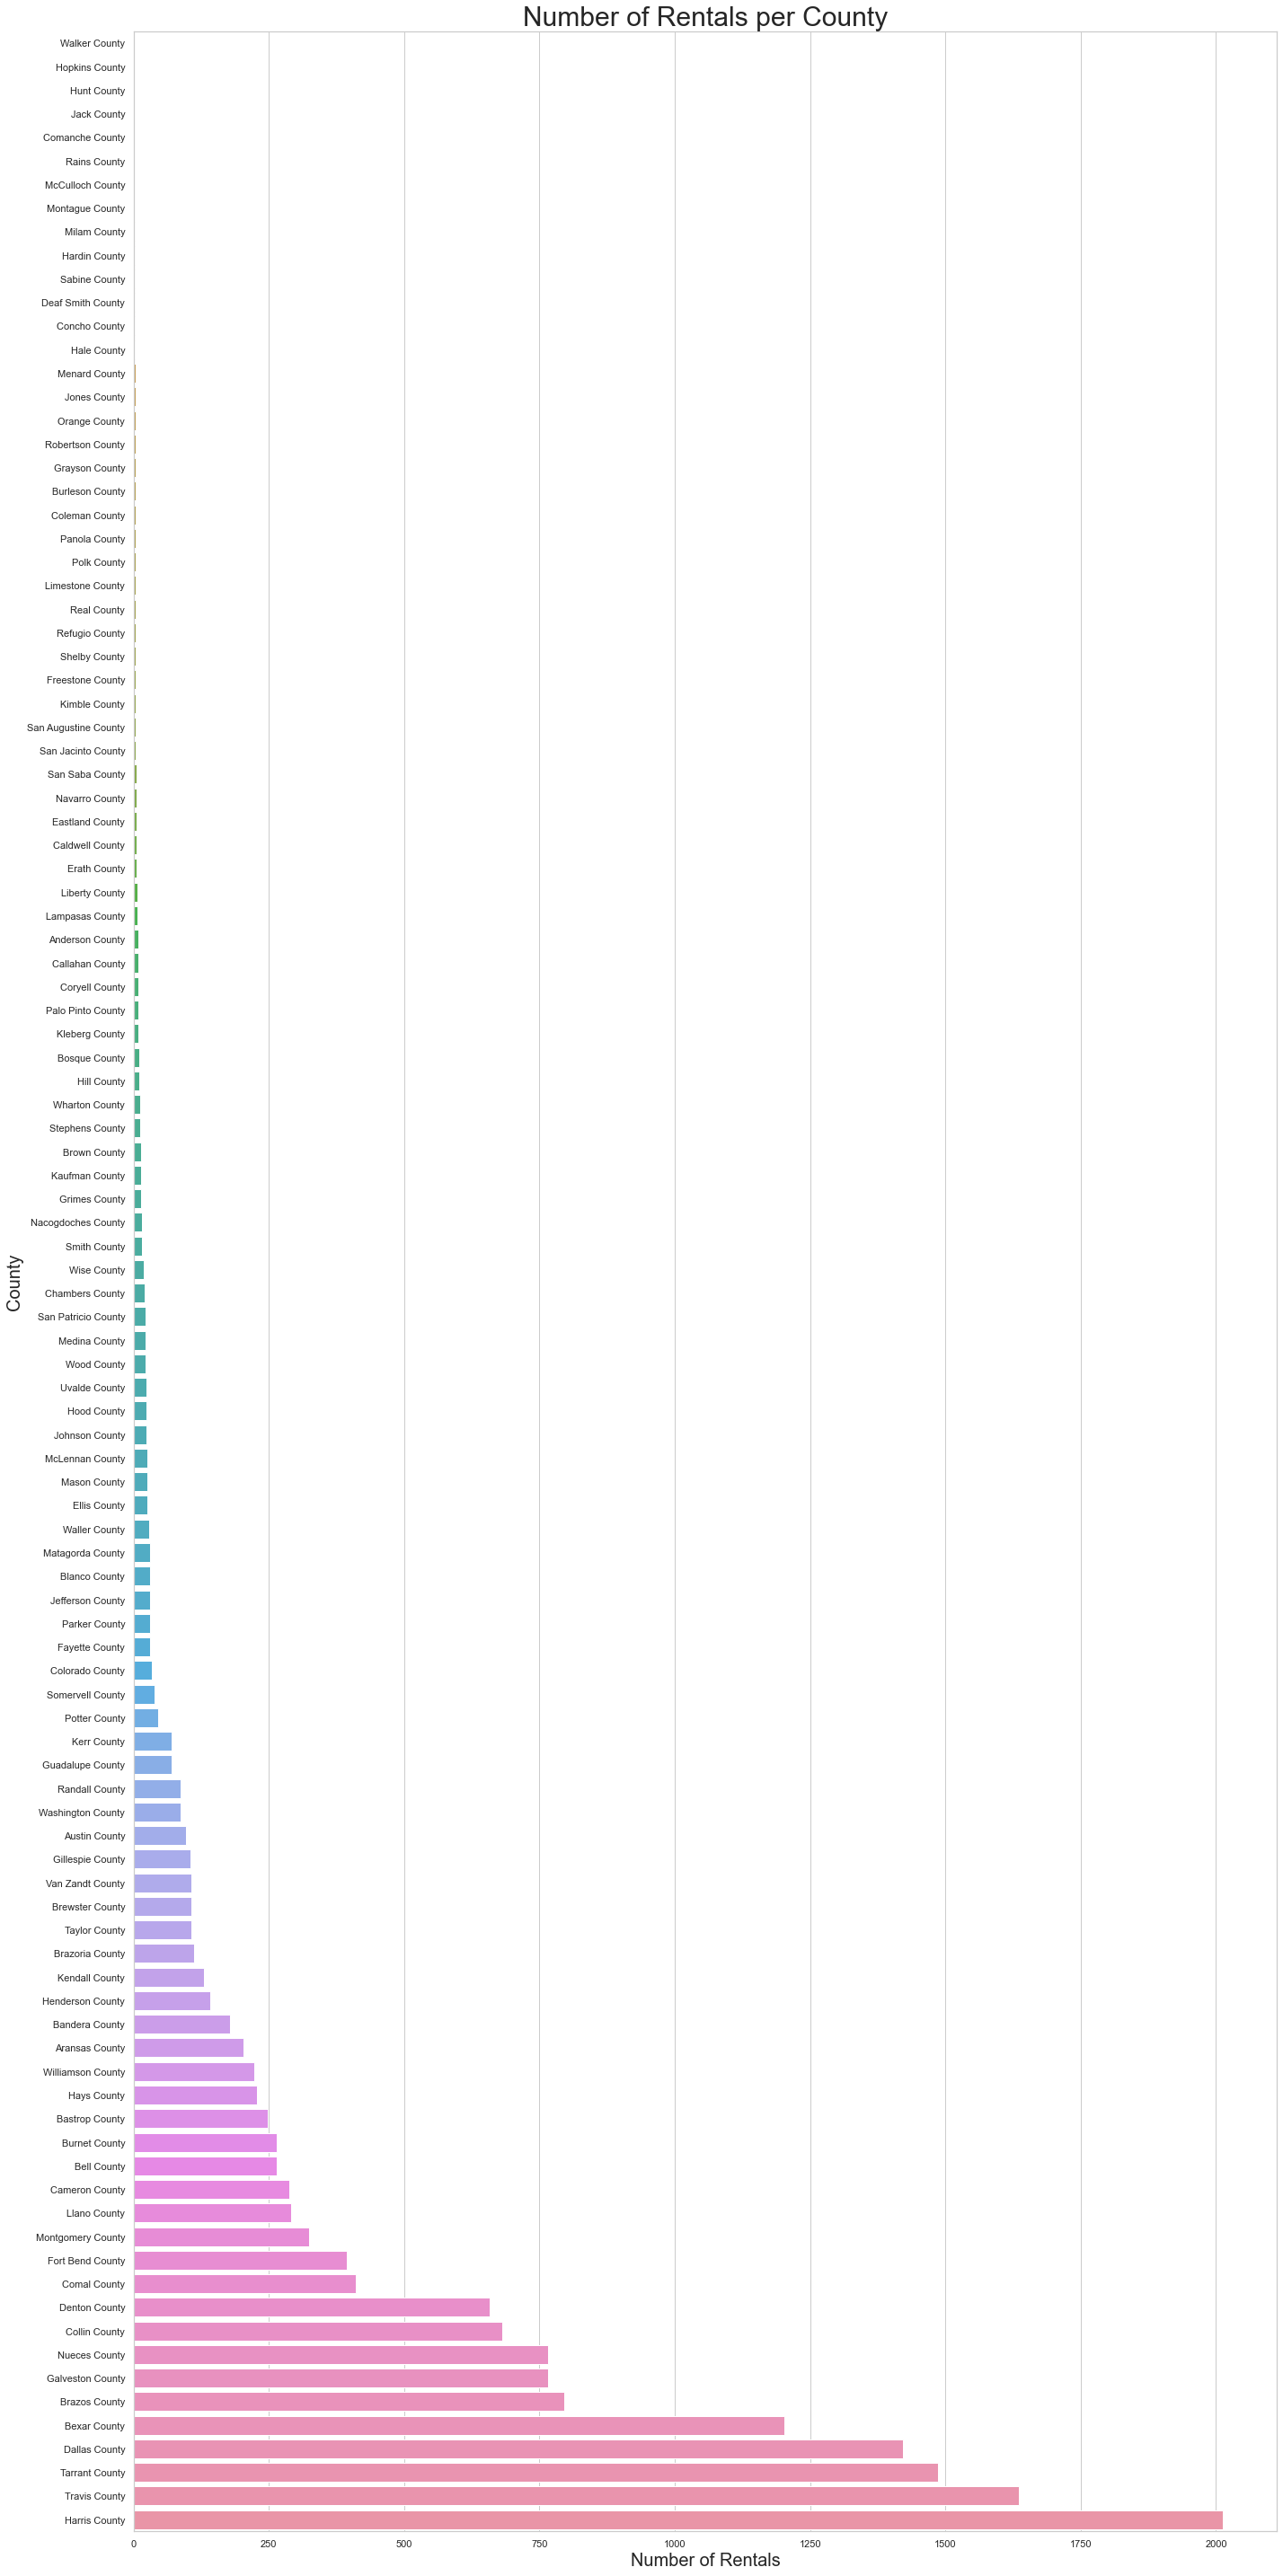

In [371]:
plt.figure(figsize = (20,40))
sns.barplot(x='city', y="counties", data=county_count, order=county_count.sort_values('city').counties)
plt.title("Number of Rentals per County", size=30)
plt.xlabel("Number of Rentals", size=20)
plt.ylabel("County", size=20)
plt.tight_layout()

In [405]:
county_sort = county_count.sort_values(by='city', ascending=False).reset_index().head(10)
# top_county_df = county_count.drop(county_count.index[-1], inplace=True)
county_sort

,index,counties,city
0,42,Harris County,2012
1,96,Travis County,1636
2,94,Tarrant County,1487
3,26,Dallas County,1422
4,6,Bexar County,1203
5,10,Brazos County,796
6,73,Nueces County,765
7,35,Galveston County,765
8,20,Collin County,681
9,28,Denton County,658


In [411]:
county_sort['city'] = county_sort['city'].astype(float)
county_sort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     10 non-null     int64  
 1   counties  10 non-null     object 
 2   city      10 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 368.0+ bytes


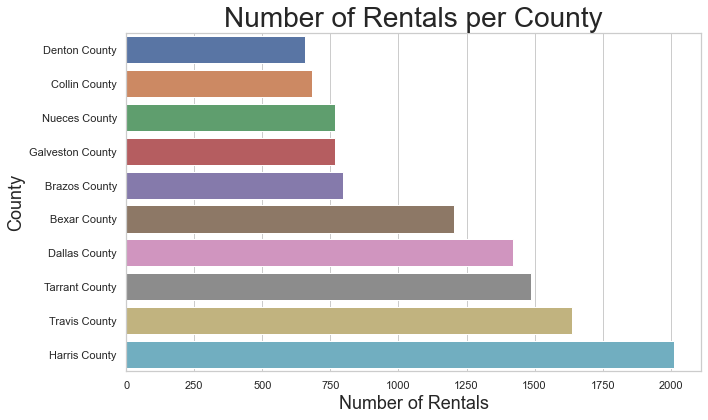

In [420]:
plt.figure(figsize = (10,6))
sns.barplot(x='city', y="counties", data=county_sort, order=county_sort.sort_values('city').counties)
plt.title("Number of Rentals per County", size=28)
plt.xlabel("Number of Rentals", size=18)
plt.ylabel("County", size=18)
plt.tight_layout()

In [389]:
top_county_df = county_count.drop(range(10-100))
top_county_df

,counties,city
0,Anderson County,8
1,Aransas County,203
2,Austin County,97
3,Bandera County,178
4,Bastrop County,248
...,...,...
95,Taylor County,106
96,Travis County,1636
97,Uvalde County,23
98,Van Zandt County,106


In [373]:
year_count = airbnb_df1.groupby('year')['city'].count().reset_index()

year_count

,year,city
0,2013,1259
1,2014,2389
2,2015,4241
3,2016,5947
4,2017,2963


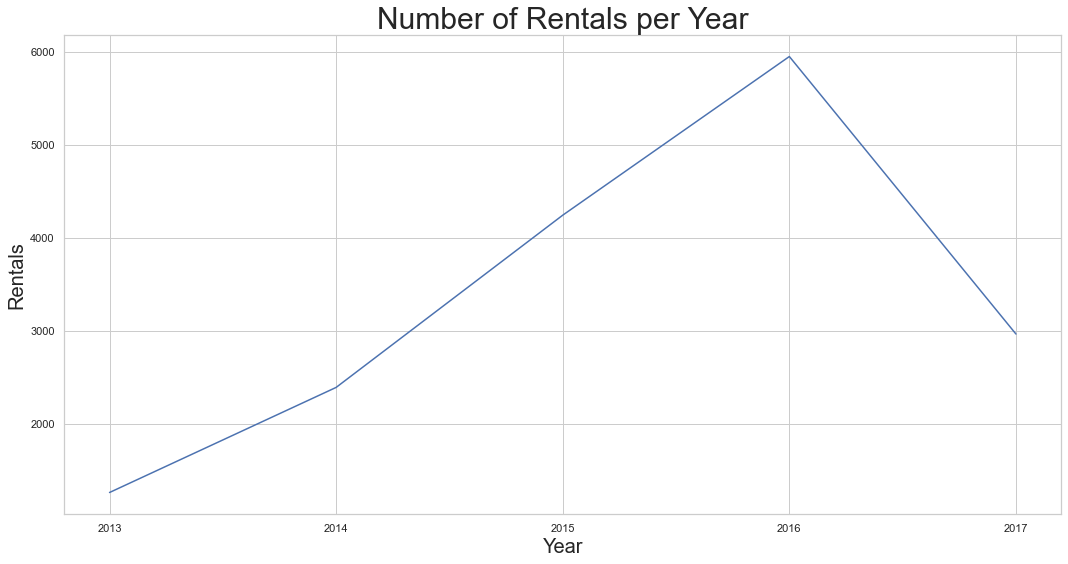

In [374]:
plt.figure(figsize = (15,8))
g=sns.lineplot(x='year', y="city", data=year_count)
plt.title("Number of Rentals per Year", size=30)
plt.xlabel("Year", size=20)
plt.ylabel("Rentals", size=20)
g.xaxis.set_major_locator(ticker.MultipleLocator(1))
g.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.tight_layout()